<h1><font size = 5>Project Deep Learning DTS Fashion MNIST</font></h1>



---



#Download Dataset

In [1]:
!mkdir data
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-25 06:20:03--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.118
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  6.49MB/s    in 3.9s    

2019-08-25 06:20:07 (6.49 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-25 06:20:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazo

#Import Library dan Dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/fashion',one_hot=True)

Using TensorFlow backend.
W0825 06:20:25.848058 139967148889984 deprecation.py:323] From <ipython-input-2-8a14e1f084ae>:18: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0825 06:20:25.849266 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0825 06:20:25.850494 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a 

Extracting data/fashion/train-images-idx3-ubyte.gz


W0825 06:20:26.182857 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0825 06:20:26.186133 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0825 06:20:26.252104 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


#Mempersiapkan Data

In [3]:
# Mengecek Bentuk Data Training
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Mengecek Bentuk Data Testing
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

#Validation
print ("Validation set (images) shape : {shape}".format(shape=data.validation.images.shape))
print ("Validation set (images) shape : {shape}".format(shape=data.validation.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)
Validation set (images) shape : (5000, 784)
Validation set (images) shape : (5000, 10)


In [0]:
# Membuat Label berupa Dictionary 
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, '(Label: Ankle boot)')

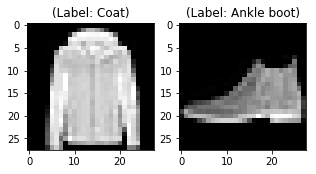

In [5]:
plt.figure(figsize=[5,5])

# Menampiilkan Data pertama pada data training
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# DMenampiilkan Data pertama pada data testing
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

#Menganilisis Data

memastikan apakah data yang terdapat dalam file sudah bernilai dalam rentan 0 hingga 1

In [6]:
data.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.49803925, 0.7137255 , 0.7254902 , 0.6313726 , 0.47058827,
       0.21568629, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16470589, 0.77647066, 0.9843138 , 1.        , 0.9843138 ,
       0.97647065, 0.9686275 , 1.        , 0.98823535, 0.83921

In [7]:
#Mengecek Batas Minimum Nilai
np.min(data.train.images[0])

0.0

In [8]:
#Mengecek Batas Maximum Nilai
np.max(data.train.images[0])

1.0

Setelah Memastikan bahwa sudah berada pada rentang 0 dan 1 maka selanjutnya, kita lakukan reshape dimana dimensinya adalah 28 X 28 X 1, yang 28 X 28 adalah pixelnya dan 1 mewakili warnanya yaitu gray.

In [0]:
# Reshape training and testing image for input
x_train = data.train.images.reshape(-1, 28, 28, 1)
X_test = data.test.images.reshape(-1,28,28,1)
x_val = data.validation.images.reshape(-1,28,28,1)

In [10]:
# Menampilkan Hasil Reshape input
x_train.shape, X_test.shape, x_val.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (5000, 28, 28, 1))

In [0]:
# Reshape training and testing image for output
y_train = data.train.labels
Y_test = data.test.labels
y_val = data.validation.labels

In [13]:
# Menampilkan Hasil Reshape output
y_train.shape, Y_test.shape, y_val.shape

((55000, 10), (10000, 10), (5000, 10))

In [14]:
print("x_train shape",x_train.shape)
print("x_val shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (55000, 28, 28, 1)
x_val shape (5000, 28, 28, 1)
y_train shape (55000, 10)
y_val shape (5000, 10)


# Membangun Model Deep Learning CNN


Modelling CNN

Kita tentukan untuk CNN model yang kita buat

    Layer 1:
        image size: 28 x 28
        image color: 1 = Black
        Functino: ReLU
        Kernel size: 3 x 3
        Filter size: 32
        Max Pooling 2 x 2
        Padding: Same

    Layer 2:
        Functino: ReLU
        Kernel size: 3 x 3
        Filter size: 64
        Max Pooling 2 x 2
        Padding: Same

    Layer 3:
        Functino: ReLU
        Kernel size: 3 x 3
        Filter size: 128
        Max Pooling 2 x 2
        Padding: Same



In [15]:
#Membuat model CNN dari library Sequential
CNNmodel = Sequential()

# Conv + Maxpool
CNNmodel.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation='relu', input_shape=(28,28,1)))
CNNmodel.add(MaxPool2D(pool_size = (2,2)))

# Dropout
CNNmodel.add(Dropout(0.25))

# Conv + Maxpool
CNNmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
CNNmodel.add(MaxPool2D(pool_size=(2,2)))

# Dropout 
CNNmodel.add(Dropout(0.25))

# Conv + Maxpool
CNNmodel.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
CNNmodel.add(MaxPool2D(pool_size=(2,2)))

# Dropout
CNNmodel.add(Dropout(0.25))

# Flatten 3D Feature Vector into 1D array
CNNmodel.add(Flatten())

# Fully Connected Layer
CNNmodel.add(Dense(256, activation='relu'))
CNNmodel.add(Dropout(0.25))
CNNmodel.add(Dense(256, activation='relu'))
CNNmodel.add(Dropout(0.1))
CNNmodel.add(Dense(10, activation='softmax'))

#Adam Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

W0825 06:27:30.824716 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 06:27:30.827694 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 06:27:30.835095 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 06:27:30.979225 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0825 06:27:30.982548 139967148889984 deprecation_wrapp

In [16]:
# Compile the Model
CNNmodel.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

W0825 06:27:37.562812 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 06:27:37.580107 139967148889984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
#Menentukan Epoch dan Batch Size 

epochs = 50
batchSize = 500

Meningkatkan jumlah epoch akan meningkatkan akurasi model, meskipun itu akan memakan waktu yang cukup lama untuk menjalankan semuanya

In [18]:
datagen = ImageDataGenerator(vertical_flip=True, # Some images may be flipped vertically
                             horizontal_flip=False,
                             height_shift_range=0.1, # Some images may be shifted vertically
                             width_shift_range=0.1, # Some images may be shifted horizontally
                             rotation_range=30, # Some images may be augmented through rotation, up to 45 degrees
                             zoom_range=0.1)


CNN = CNNmodel.fit_generator(datagen.flow(x_train, y_train, batch_size=batchSize), epochs=epochs, validation_data=(x_val, y_val), steps_per_epoch=x_train.shape[0] // batchSize)

W0825 06:27:47.076359 139967148889984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
110/110 [==============================] - 16s 146ms/step - loss: 1.2745 - acc: 0.5069 - val_loss: 0.8105 - val_acc: 0.6802
Epoch 2/50
110/110 [==============================] - 15s 135ms/step - loss: 0.8483 - acc: 0.6747 - val_loss: 0.6841 - val_acc: 0.7244
Epoch 3/50
110/110 [==============================] - 15s 135ms/step - loss: 0.7542 - acc: 0.7096 - val_loss: 0.6154 - val_acc: 0.7530
Epoch 4/50
110/110 [==============================] - 15s 134ms/step - loss: 0.7018 - acc: 0.7304 - val_loss: 0.5714 - val_acc: 0.7728
Epoch 5/50
110/110 [==============================] - 15s 134ms/step - loss: 0.6596 - acc: 0.7474 - val_loss: 0.5199 - val_acc: 0.7914
Epoch 6/50
110/110 [==============================] - 15s 134ms/step - loss: 0.6308 - acc: 0.7581 - val_loss: 0.4735 - val_acc: 0.8228
Epoch 7/50
110/110 [==============================] - 15s 135ms/step - loss: 0.6033 - acc: 0.7706 - val_loss: 0.4744 - val_acc: 0.8154
Epoch 8/50
110/110 [==============================] - 1

#Evaluasi Model

In [19]:
#Mengecek Akurasi Model setelah fitting model
print("Accuracy after fitting: {:.2f}%".format(CNN.history['acc'][-1]*100))

Accuracy after fitting: 85.94%


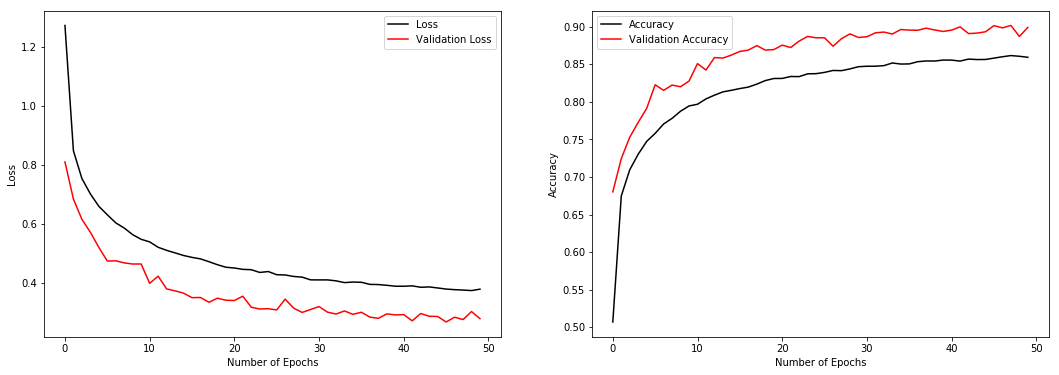

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(CNN.history['loss'], color="black", label = "Loss")
plt.plot(CNN.history['val_loss'], color="red", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(CNN.history['acc'], color="black", label = "Accuracy")
plt.plot(CNN.history['val_acc'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [0]:
#Menampilkan Akurasi Data Test dari Model
score = CNNmodel.evaluate(X_test, Y_test)
print("Test Accuracy: {:.2f}%".format(score[1]*100))
print("Test Loss: {:.3f}".format(score[0]))

#Plot Confusion Matrix

Confusion Matrix akan memungkinkan kita untuk memvisualisasikan kinerja algoritma model yang telah dibuat, memplot jawaban yang benar terhadap jawaban yang diprediksi model yang telah dibuat. Dengan itu, kita akan dapat melihat 'kelas' item pakaian mana yang paling tidak diprediksi oleh model kita.

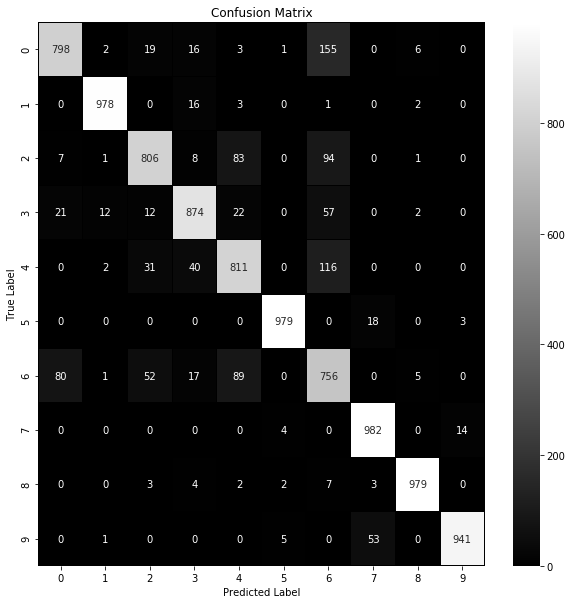

Class: 0
Number of Wrong Prediction: 202 out of 1000
Class: 1
Number of Wrong Prediction: 22 out of 1000
Class: 2
Number of Wrong Prediction: 194 out of 1000
Class: 3
Number of Wrong Prediction: 126 out of 1000
Class: 4
Number of Wrong Prediction: 189 out of 1000
Class: 5
Number of Wrong Prediction: 21 out of 1000
Class: 6
Number of Wrong Prediction: 244 out of 1000
Class: 7
Number of Wrong Prediction: 18 out of 1000
Class: 8
Number of Wrong Prediction: 21 out of 1000
Class: 9
Number of Wrong Prediction: 59 out of 1000


In [21]:
#Mengubah variabel Kebentuk Argumen array
Y_pred = CNNmodel.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan Confusion Matrix
for i in range(len(confusionMatrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusionMatrix[i])-confusionMatrix[i][i]), "out of 1000")

In [22]:
#import library untuk menampilkan f1score
from sklearn.metrics import classification_report

#Menampilkan Nilai F1 score Confusion Matrix
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.81      0.84      1000
           3       0.90      0.87      0.89      1000
           4       0.80      0.81      0.81      1000
           5       0.99      0.98      0.98      1000
           6       0.64      0.76      0.69      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

